# **Step 1: Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 2:Load the Dataset**

In [2]:
df = pd.read_csv("ABC_Employees.csv")

# **Step 3: Preprocessing**

In [3]:
print(df.isnull().sum())

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64


 3a. Handling missing values
 Forward fill for category coloumns, Filling with mean in numerical, Height rows from 150-18-0 with random numbers.

In [4]:
#College is a categorical coloumn
df["College"] = df["College"].ffill()


3b. Figuring out mean, median and standard deviation values to decide which can be susbtituted

In [5]:
mean_salary = df["Salary"].mean()
median_salary = df["Salary"].median()

print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")

Mean Salary: 4833969.545861297
Median Salary: 2836186.0


In [6]:
min_salary = df["Salary"].min()
max_salary = df["Salary"].max()

print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")

std_salary = df["Salary"].std()

print(f"Standard Deviation: {std_salary}")

Minimum Salary: 30888.0
Maximum Salary: 25000000.0
Standard Deviation: 5226620.431853974


3c. from above it can decuded that there much deviation could be due to outliers.

In [7]:
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count number of outliers
outliers = df[(df["Salary"] < lower_bound) | (df["Salary"] > upper_bound)]
print(f"Number of Salary Outliers: {len(outliers)}")

Number of Salary Outliers: 34


3d. Median can be taken for filling

In [8]:
df["Salary"] = df["Salary"].fillna(df["Salary"].median())

In [9]:
df["Height"] = pd.to_numeric(df["Height"], errors='coerce') # converting height to numeric or int values.

3d. replacing height with randm values

In [10]:
df.loc[df["Height"].isnull(), "Height"] = np.random.randint(150, 181, size=df["Height"].isnull().sum())

In [11]:
print(df.isnull().sum())
print(df.dtypes)


Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64
Name         object
Team         object
Number        int64
Position     object
Age           int64
Height      float64
Weight        int64
College      object
Salary      float64
dtype: object


# **Step 4: Analysis**

**4a Employee Distribution by Team**

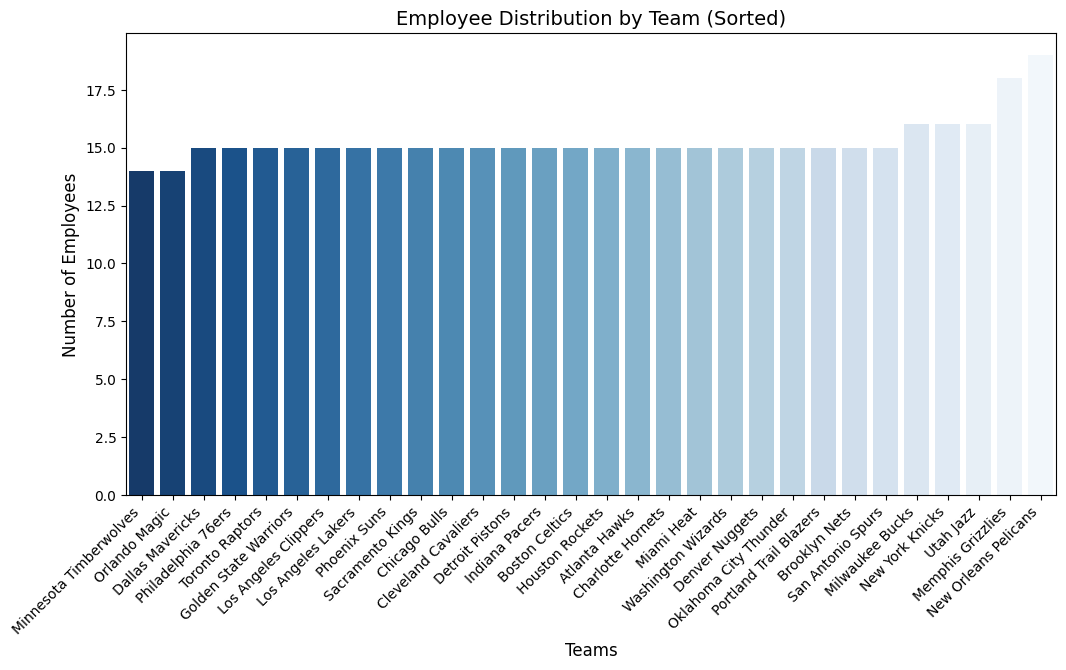

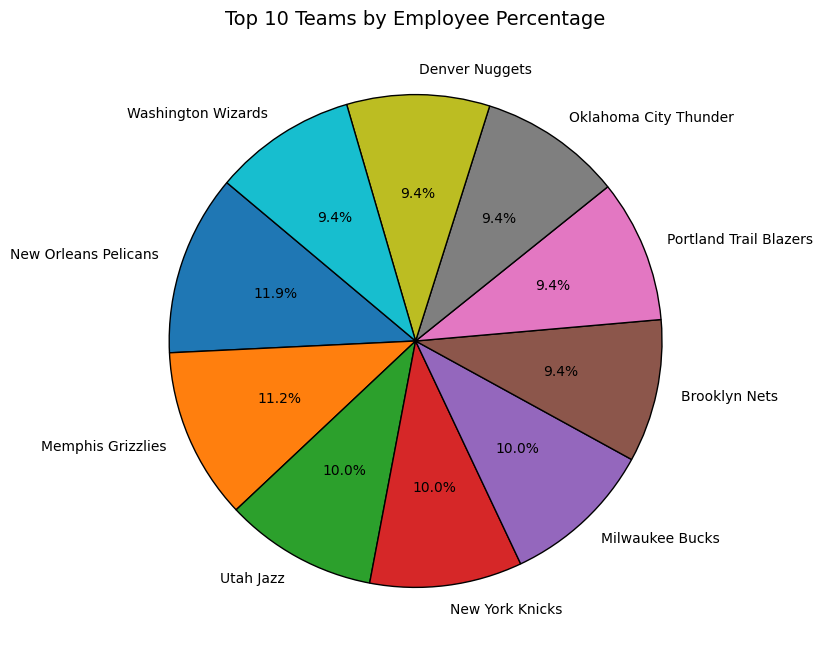

In [12]:
# Sort teams by number of employees
sorted_teams = df["Team"].value_counts().sort_values()

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_teams.index, y=sorted_teams.values, hue=sorted_teams.index, dodge=False, legend=False, palette="Blues_r")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.title("Employee Distribution by Team (Sorted)", fontsize=14)
plt.show()


# Gets Top 10 Teams with highest employees
top_teams = df["Team"].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_teams, labels=top_teams.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("tab10"), wedgeprops={'edgecolor': 'black'})
plt.title("Top 10 Teams by Employee Percentage", fontsize=14)
plt.show()



**4b Employees Segregation by Position**

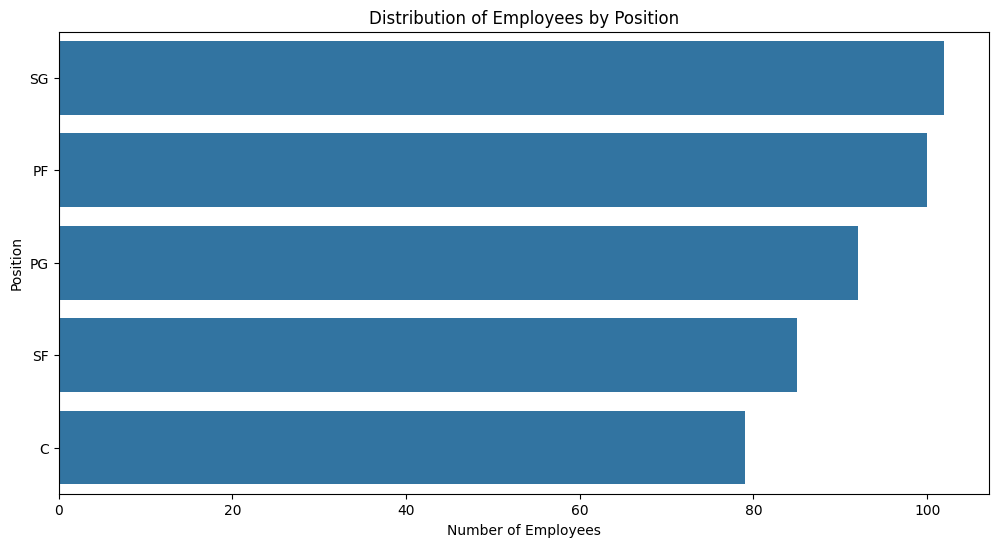

In [13]:
#Plot for Positions
plt.figure(figsize=(12,6))
sns.countplot(y=df["Position"], order=df["Position"].value_counts().index)
plt.xlabel("Number of Employees")
plt.ylabel("Position")
plt.title("Distribution of Employees by Position")
plt.show()


**4c Identify Predominant Age Group**

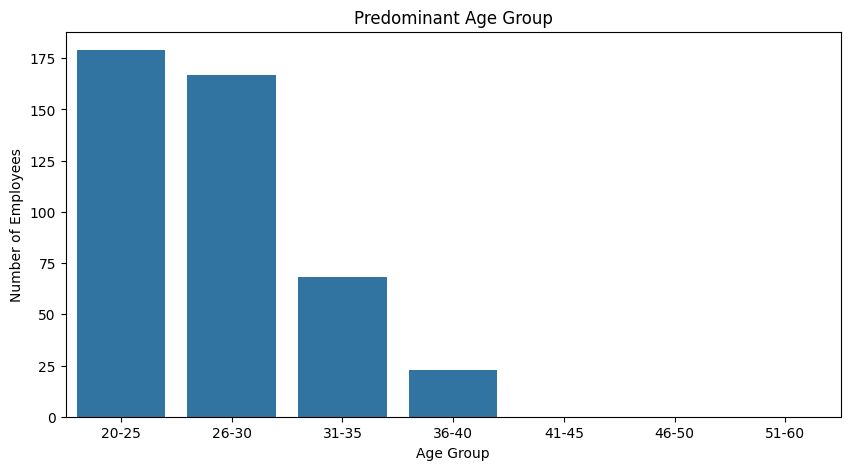

In [14]:
# Create Age Groups
age_bins = [20, 25, 30, 35, 40, 45, 50, 60]
df["Age_group"] = pd.cut(df["Age"], bins=age_bins, labels=["20-25", "26-30", "31-35", "36-40", "41-45", "46-50", "51-60"])

# Histogram for Age Distribution
plt.figure(figsize=(10,5))
sns.countplot(x=df["Age_group"], order=df["Age_group"].value_counts().index)
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.title("Predominant Age Group")
plt.show()

**4d Team & Position with the Highest Salary Expenditure**

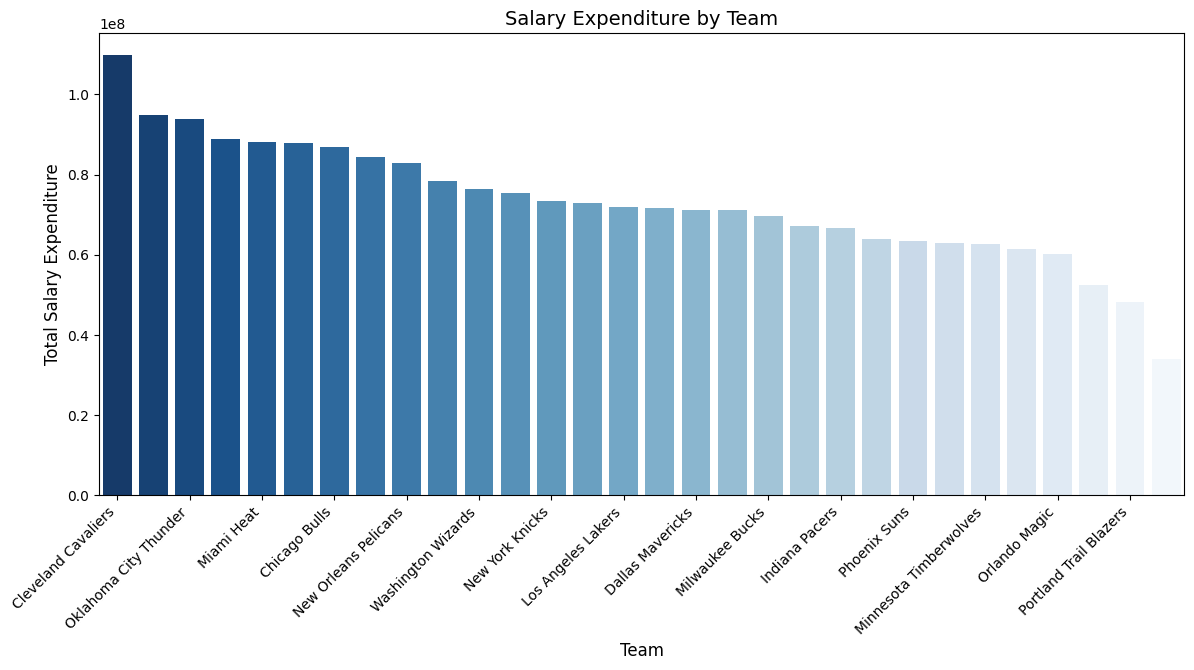

In [16]:


# Sum salaries by team & position
team_salary = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)
position_salary = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)

# Salary Expenditure by Team
plt.figure(figsize=(14,6))

sns.barplot(x=team_salary.index, y=team_salary.values, hue=team_salary.index, dodge=False, legend=False, palette="Blues_r")

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Total Salary Expenditure", fontsize=12)
plt.title("Salary Expenditure by Team", fontsize=14)

plt.xticks(np.arange(0, len(team_salary), step=2), team_salary.index[::2])

plt.show()



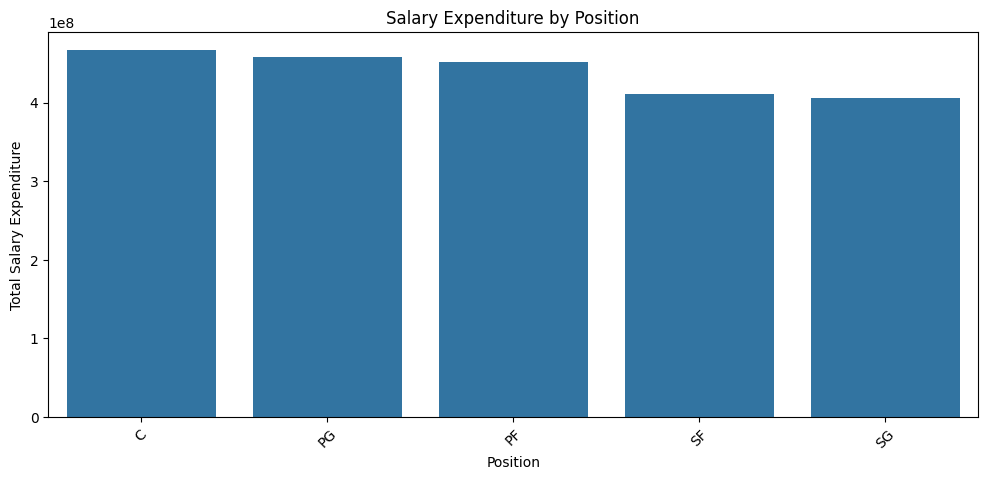

In [17]:
# Salary Expenditure by Position
plt.figure(figsize=(12,5))
sns.barplot(x=position_salary.index, y=position_salary.values)
plt.xticks(rotation=45)
plt.xlabel("Position")
plt.ylabel("Total Salary Expenditure")
plt.title("Salary Expenditure by Position")
plt.show()


**4e Correlation Between Age and Salary**

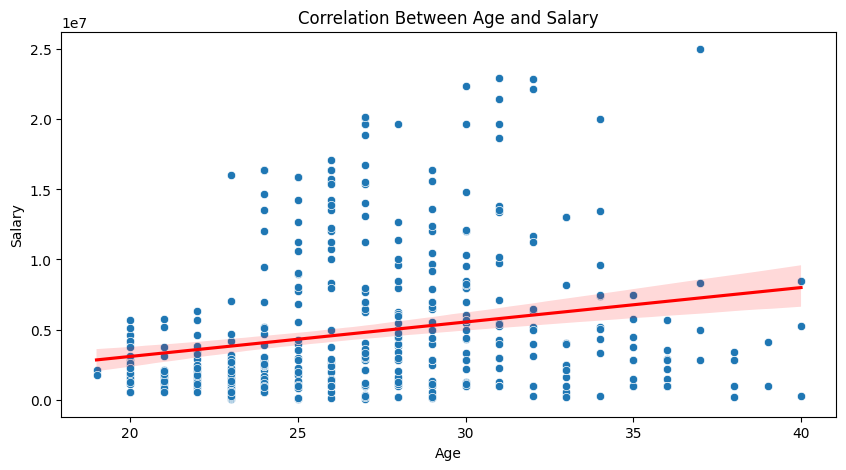

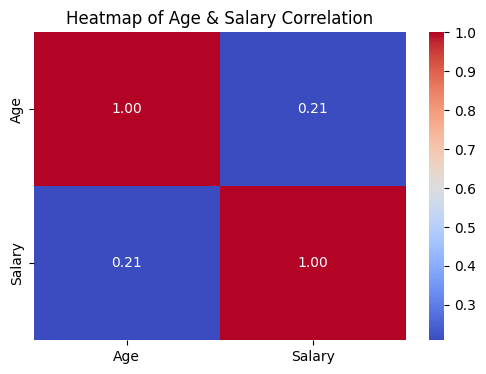

In [18]:
# Scatter Plot for Age vs Salary
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["Age"], y=df["Salary"])
sns.regplot(x=df["Age"], y=df["Salary"], scatter=False, color="red")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Correlation Between Age and Salary")
plt.show()

# Heatmap for Correlation
plt.figure(figsize=(6,4))
sns.heatmap(df[["Age", "Salary"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Age & Salary Correlation")
plt.show()

# **Data story**

# **Data Story: ABC Company Employee Analysis**

**This report provides insights into ABC Company's workforce distribution, salary trends, and team compositions. The analysis is based on employee data and focuses on five key aspects: team distribution, position segregation, age demographics, salary expenditure, and correlation between age & salary.**

In [20]:
#  Data Story: ABC Company Employee Analysis
print("==============================================")
print(" ABC Company Employee Analysis Report ")
print("==============================================")
print("\nThis report provides insights into ABC Company's workforce distribution, salary trends, and team compositions.")

# 1. Employee Distribution by Team
print("\n==============================================")
print(" 1. Employee Distribution by Team")
print("==============================================")
largest_team = df['Team'].value_counts().idxmax()
largest_team_count = df['Team'].value_counts().max()
smallest_team = df['Team'].value_counts().idxmin()
smallest_team_count = df['Team'].value_counts().min()

print(f"\n- The largest team is {largest_team}, employing {largest_team_count} employees.")
print(f"- The smallest team is {smallest_team}, with only {smallest_team_count} employees.")

print("\nKey Insight:")
print(f"- Teams like {largest_team} have a significantly larger workforce, likely indicating a core business function requiring more personnel.")
print(f"- On the other hand, {smallest_team} might be a specialized team with fewer employees.")

# 2. Position Segregation
print("\n==============================================")
print(" 2. Segregation of Employees by Position")
print("==============================================")
most_common_position = df["Position"].value_counts().idxmax()
most_common_position_count = df["Position"].value_counts().max()

print(f"\n- The most common position is {most_common_position}, with {most_common_position_count} employees.")
print("\nKey Insight:")
print(f"- Positions like {most_common_position} are in high demand, possibly due to their crucial role in company operations.")
print("- Less frequent positions may be specialized roles or managerial positions requiring advanced skills.")

# 3. Age Group Distribution
print("\n==============================================")
print(" 3. Predominant Age Group")
print("==============================================")
most_common_age_group = df["Age_group"].value_counts().idxmax()
most_common_age_group_count = df["Age_group"].value_counts().max()

print(f"\n- The age group with the most employees is {most_common_age_group}, making up {most_common_age_group_count} employees.")
print("\nKey Insight:")
print(f"- The majority of employees fall in the {most_common_age_group} age group, indicating a mid-career workforce.")
print("- A lower number of younger employees suggests limited fresh graduate recruitment, while fewer older employees could indicate low retention beyond a certain age.")

# 4. Salary Expenditure by Team & Position
print("\n==============================================")
print(" 4. Salary Expenditure by Team & Position")
print("==============================================")
highest_salary_team = team_salary.idxmax()
highest_salary_team_value = team_salary.max()
highest_salary_position = position_salary.idxmax()
highest_salary_position_value = position_salary.max()

print(f"\n- The highest salary expenditure is in the {highest_salary_team} team, totaling ₹{highest_salary_team_value:,.0f}.")
print(f"- The position with the highest salary expenditure is {highest_salary_position}, with ₹{highest_salary_position_value:,.0f} allocated.")

print("\nKey Insight:")
print(f"- The {highest_salary_team} team accounts for the highest total salary cost, likely due to higher headcount or senior employees.")
print(f"- Similarly, the {highest_salary_position} role has the highest financial impact, possibly indicating a leadership or highly skilled position.")

# 5. Correlation Between Age & Salary
correlation_value = df[["Age", "Salary"]].corr().iloc[0,1]
print("\n==============================================")
print(" 5. Correlation Between Age & Salary")
print("==============================================")
print(f"\n- The correlation coefficient between Age & Salary is {correlation_value:.2f}.")

print("\nKey Insight:")
if correlation_value > 0.5:
    print("Strong positive correlation → Older employees tend to earn significantly more.")
elif correlation_value > 0:
    print("Weak correlation → There is a slight trend, but salary is not strictly dependent on age.")
else:
    print("No correlation → Age does not influence salary, suggesting a performance-based pay structure.")

# Business Insights & Recommendations
print("\n==============================================")
print(" Business Insights & Recommendations")
print("==============================================")

print("\nUnderstanding Team Growth Needs:")
print(f"- Teams like {largest_team} may require better resource allocation or hiring strategies to manage workload effectively.")

print("\nStrategic Workforce Planning:")
print(f"- With most employees in the {most_common_age_group} age group, the company might focus on succession planning, leadership grooming, and hiring young talent to maintain workforce balance.")

print("\nBudgeting for Salary Expenditure:")
print(f"- Since the {highest_salary_team} team and {highest_salary_position} position have the highest salary impact, HR and finance teams should analyze whether these salaries align with business priorities.")

print("\nAge & Salary Correlation – Retention vs. Performance:")
if correlation_value > 0.5:
    print("- If age and salary are strongly correlated, the company may need to balance rewarding experience vs. performance-based pay structures.")
elif correlation_value > 0:
    print("- Since the correlation is weak, salary adjustments should be evaluated beyond just experience, focusing on skills and contributions.")
else:
    print("- Since there is no correlation between age and salary, the company has a performance-driven salary structure, ensuring fair compensation.")

print("\nFinal Takeaway:")
print("This analysis provides valuable insights for workforce planning, salary structuring, and business strategy.")




 ABC Company Employee Analysis Report 

This report provides insights into ABC Company's workforce distribution, salary trends, and team compositions.

 1. Employee Distribution by Team

- The largest team is New Orleans Pelicans, employing 19 employees.
- The smallest team is Orlando Magic, with only 14 employees.

Key Insight:
- Teams like New Orleans Pelicans have a significantly larger workforce, likely indicating a core business function requiring more personnel.
- On the other hand, Orlando Magic might be a specialized team with fewer employees.

 2. Segregation of Employees by Position

- The most common position is SG, with 102 employees.

Key Insight:
- Positions like SG are in high demand, possibly due to their crucial role in company operations.
- Less frequent positions may be specialized roles or managerial positions requiring advanced skills.

 3. Predominant Age Group

- The age group with the most employees is 20-25, making up 179 employees.

Key Insight:
- The majority

# **Final Takeaway**
**This analysis provides valuable insights for workforce planning, salary structuring, and business strategy. By understanding employee distribution, salary trends, and workforce demographics, ABC Company can make data-driven HR decisions to improve hiring, salary planning, and team structuring.**